In [55]:
import pandas as pd

In [57]:
import psycopg2
engine = psycopg2.connect("dbname='dvdrental' user='postgres' host='localhost' port='5432' password='5432'")

In [63]:
df = pd.read_sql('select * from film', con=engine)

/var/folders/t0/ydrjmprn11g1v5lcl2zp9k4c0000gp/T/ipykernel_1145/453622561.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('select * from film', con=engine)


In [65]:
df

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58.951,[Trailers],'chamber':1 'fate':4 'husband':11 'italian':2 ...
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58.951,[Behind the Scenes],'australia':18 'cat':8 'drama':5 'epic':4 'exp...
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,2013-05-26 14:50:58.951,[Trailers],'airport':1 'ancient':18 'confront':14 'epic':...
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,2013-05-26 14:50:58.951,[Trailers],'boat':20 'bright':1 'conquer':14 'encount':2 ...
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"[Deleted Scenes, Behind the Scenes]",'academi':1 'battl':15 'canadian':20 'dinosaur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Young Language,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,6,0.99,183,9.99,G,2013-05-26 14:50:58.951,"[Trailers, Behind the Scenes]",'administr':12 'boat':8 'boy':17 'databas':11 ...
996,997,Youth Kick,A Touching Drama of a Teacher And a Cat who mu...,2006,1,4,0.99,179,14.99,NC-17,2013-05-26 14:50:58.951,"[Trailers, Behind the Scenes]",'boat':22 'cat':11 'challeng':14 'drama':5 'ki...
997,998,Zhivago Core,A Fateful Yarn of a Composer And a Man who mus...,2006,1,6,0.99,105,10.99,NC-17,2013-05-26 14:50:58.951,[Deleted Scenes],'boy':16 'canadian':19 'compos':8 'core':2 'fa...
998,999,Zoolander Fiction,A Fateful Reflection of a Waitress And a Boat ...,2006,1,5,2.99,101,28.99,R,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]",'ancient':19 'boat':11 'china':20 'discov':14 ...


In [67]:
query = """
with
film
as
(SELECT 
	title,
	f.rating,
	f.release_year,
	f.film_id,
CASE
		WHEN release_year > 2020 AND release_year <= 2024 THEN 'NEW_FILM'
		WHEN release_year > 2005 AND release_year <= 2020 THEN 'NOT OLD NOT NEW'
		WHEN release_year < 2005 THEN 'OLD_FILM'
END
FROM film as f
INNER JOIN 
	inventory AS inv
ON inv.film_id = f.film_id
Group by 
inv.film_id, f.film_id
)
SELECT *
  FROM film
;
"""

In [69]:
df = pd.read_sql(query, con=engine)

/var/folders/t0/ydrjmprn11g1v5lcl2zp9k4c0000gp/T/ipykernel_1145/1727333228.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con=engine)


In [71]:
df

,title,rating,release_year,film_id,case
0,Pajama Jawbreaker,R,2006,652,NOT OLD NOT NEW
1,Effect Gladiator,PG,2006,273,NOT OLD NOT NEW
2,Balloon Homeward,NC-17,2006,51,NOT OLD NOT NEW
3,Voyage Legally,PG-13,2006,951,NOT OLD NOT NEW
4,Stallion Sundance,PG-13,2006,839,NOT OLD NOT NEW
...,...,...,...,...,...
953,License Weekend,NC-17,2006,520,NOT OLD NOT NEW
954,Beethoven Exorcist,PG-13,2006,64,NOT OLD NOT NEW
955,Barbarella Streetcar,G,2006,55,NOT OLD NOT NEW
956,Shootist Superfly,PG-13,2006,790,NOT OLD NOT NEW


In [111]:
df.shape

(958, 5)

In [75]:
df.size

4790

In [77]:
df.dtypes

title           object
rating          object
release_year     int64
film_id          int64
case            object
dtype: object

In [79]:
df.describe()

,release_year,film_id
count,958.0,958.000000
mean,2006.0,502.598121
std,0.0,287.541738
min,2006.0,1.000000
25%,2006.0,256.250000
50%,2006.0,504.500000
75%,2006.0,751.750000
max,2006.0,1000.000000


In [81]:
df['rating'].value_counts()

rating
PG-13    213
NC-17    202
R        189
PG       183
G        171
Name: count, dtype: int64

<Axes: >

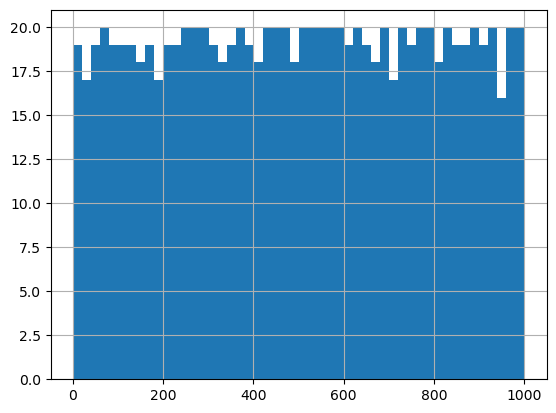

In [83]:
df['film_id'].hist(bins = 50)